In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try_data=pd.read_csv("E:\Liver-Cirrhosis-Analysis\indian-liver-patient-records\indian_liver_patient.csv")
try_data

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\riddh\AppData\Local\Temp\ipykernel_1936\2525367048.py:1: SyntaxWarning: invalid escape sequence '\L'
  try_data=pd.read_csv("E:\Liver-Cirrhosis-Analysis\indian-liver-patient-records\indian_liver_patient.csv")


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
try_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,583.0,NaN,NaN,NaN,44.746141,16.189833,4.0,33.0,45.0,58.0,90.0
Gender,583,2,Male,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Bilirubin,583.0,NaN,NaN,NaN,3.298799,6.209522,0.4,0.8,1.0,2.6,75.0
Direct_Bilirubin,583.0,NaN,NaN,NaN,1.486106,2.808498,0.1,0.2,0.3,1.3,19.7
Alkaline_Phosphotase,583.0,NaN,NaN,NaN,290.576329,242.937989,63.0,175.5,208.0,298.0,2110.0
Alamine_Aminotransferase,583.0,NaN,NaN,NaN,80.713551,182.620356,10.0,23.0,35.0,60.5,2000.0
Aspartate_Aminotransferase,583.0,NaN,NaN,NaN,109.910806,288.918529,10.0,25.0,42.0,87.0,4929.0
Total_Protiens,583.0,NaN,NaN,NaN,6.48319,1.085451,2.7,5.8,6.6,7.2,9.6
Albumin,583.0,NaN,NaN,NaN,3.141852,0.795519,0.9,2.6,3.1,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,NaN,NaN,NaN,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


In [4]:
cat_cols=try_data.select_dtypes(include=['object']).columns
num_cols = try_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Gender'], dtype='object')
Numerical Variables:
['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


Age
Skew : -0.03


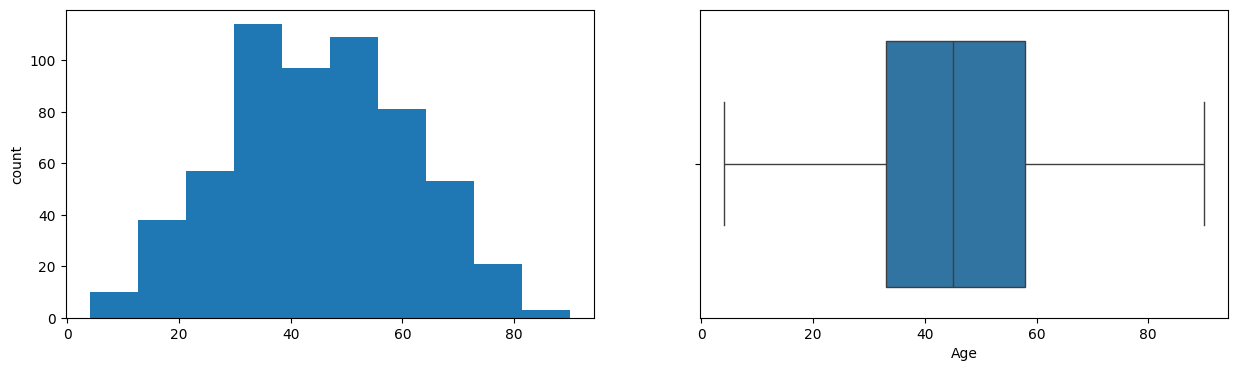

Total_Bilirubin
Skew : 4.91


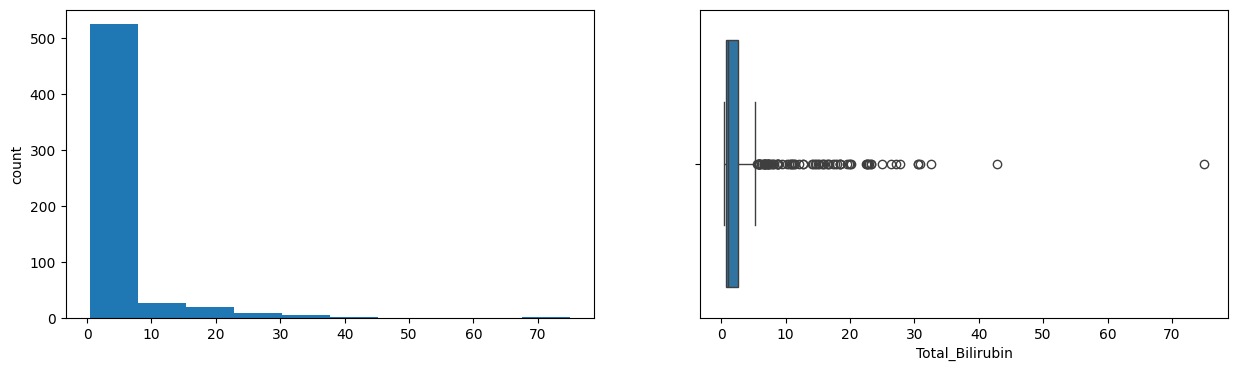

Direct_Bilirubin
Skew : 3.21


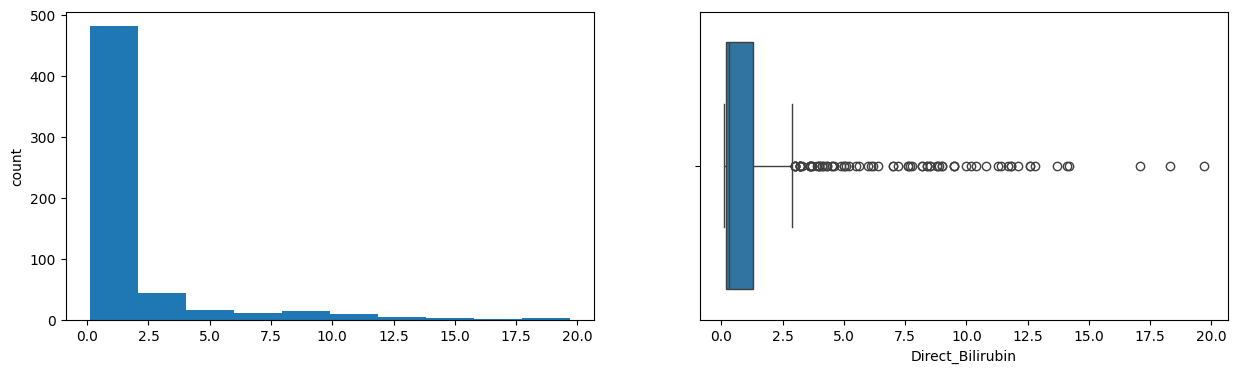

Alkaline_Phosphotase
Skew : 3.77


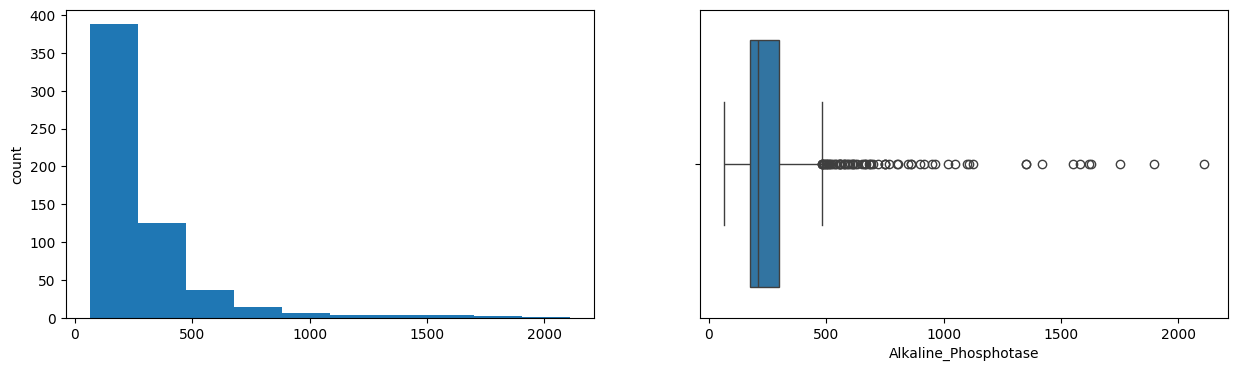

Alamine_Aminotransferase
Skew : 6.55


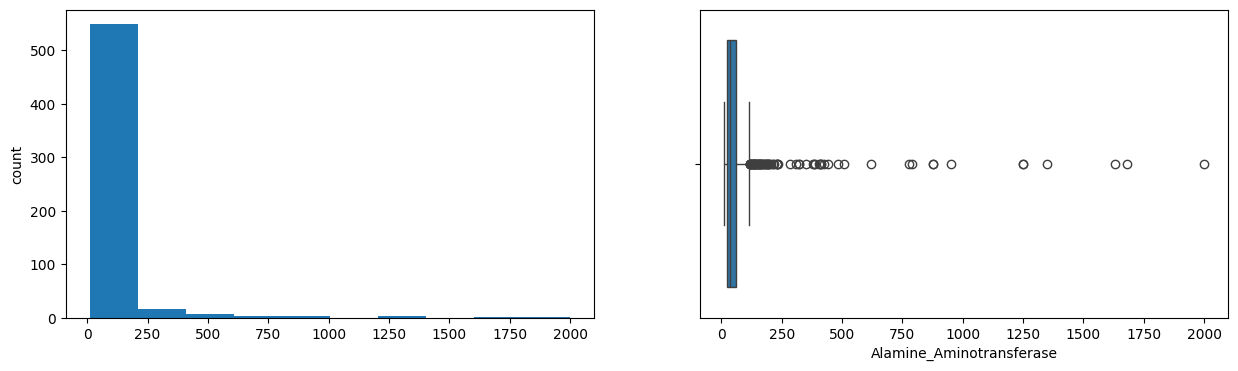

Aspartate_Aminotransferase
Skew : 10.55


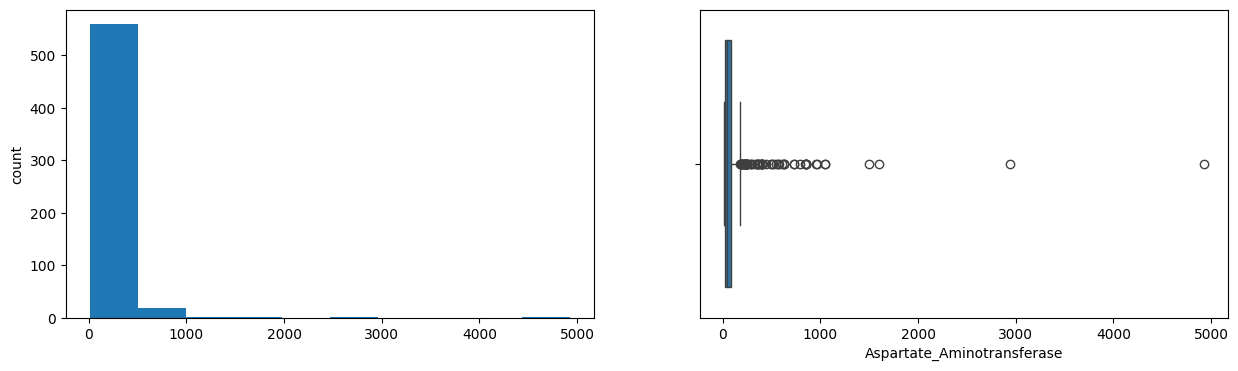

Total_Protiens
Skew : -0.29


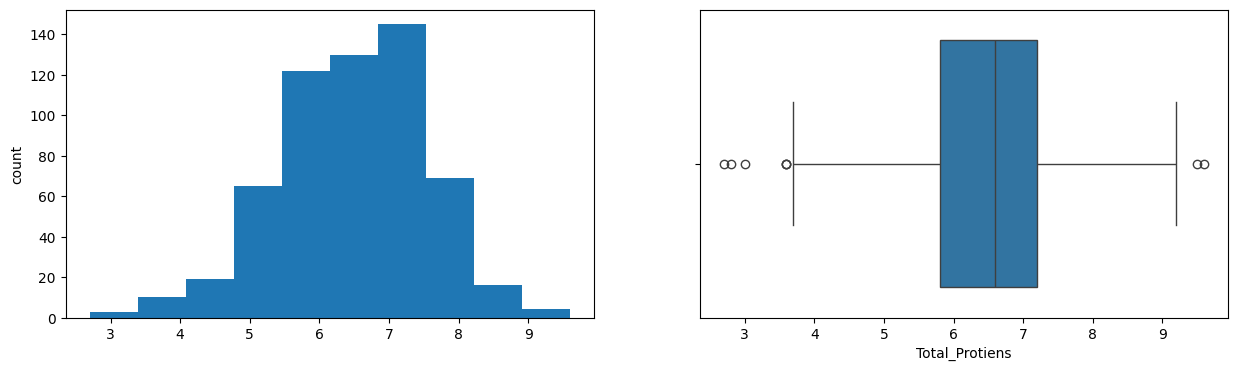

Albumin
Skew : -0.04


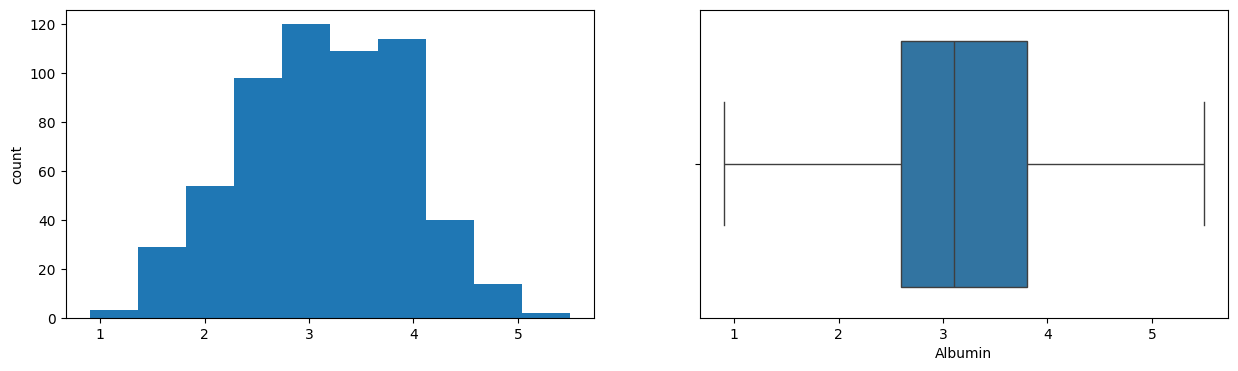

Albumin_and_Globulin_Ratio
Skew : 0.99


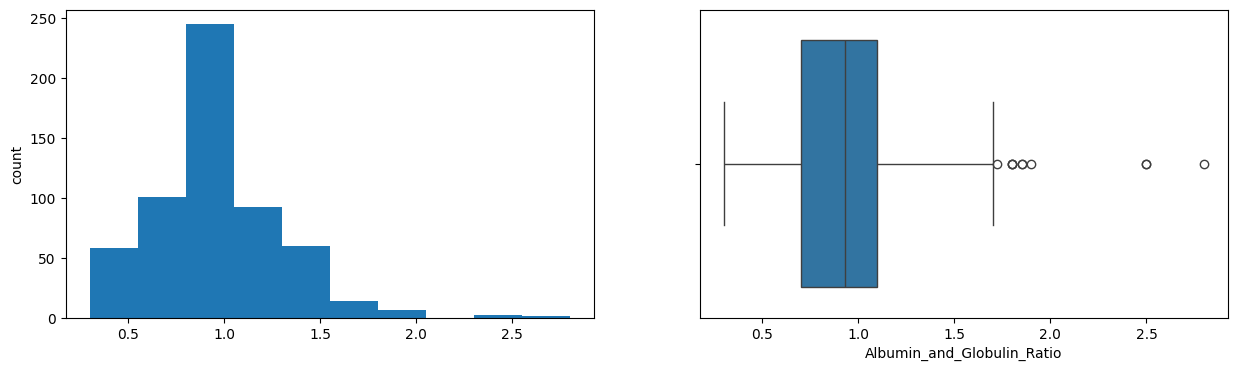

Dataset
Skew : 0.95


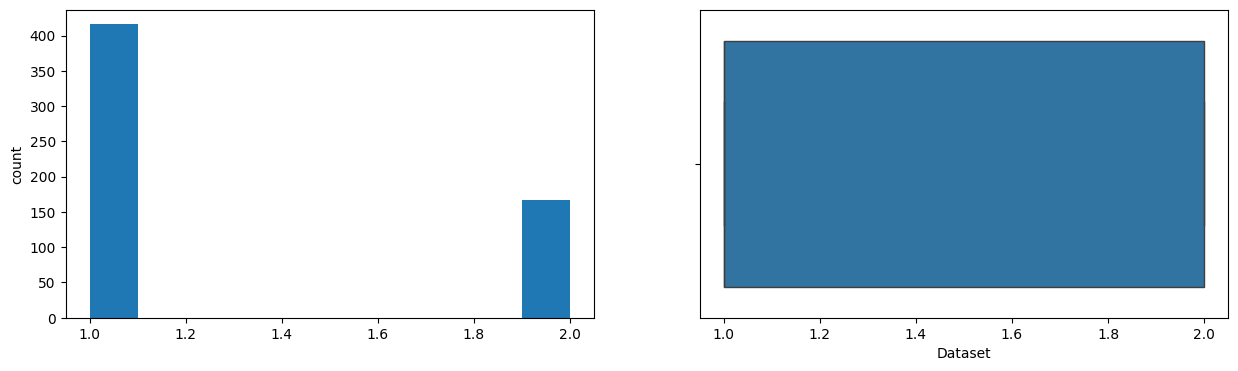

In [5]:
for col in num_cols:
    print(col)
    print('Skew :', round(try_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    try_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=try_data[col])
    plt.show()

In [9]:
block=pd.DataFrame(try_data)

In [10]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 

block['Gender']= label.fit_transform(block['Gender']) 
print(block['Gender'].unique())

[0 1]


In [11]:
print(block)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       0              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

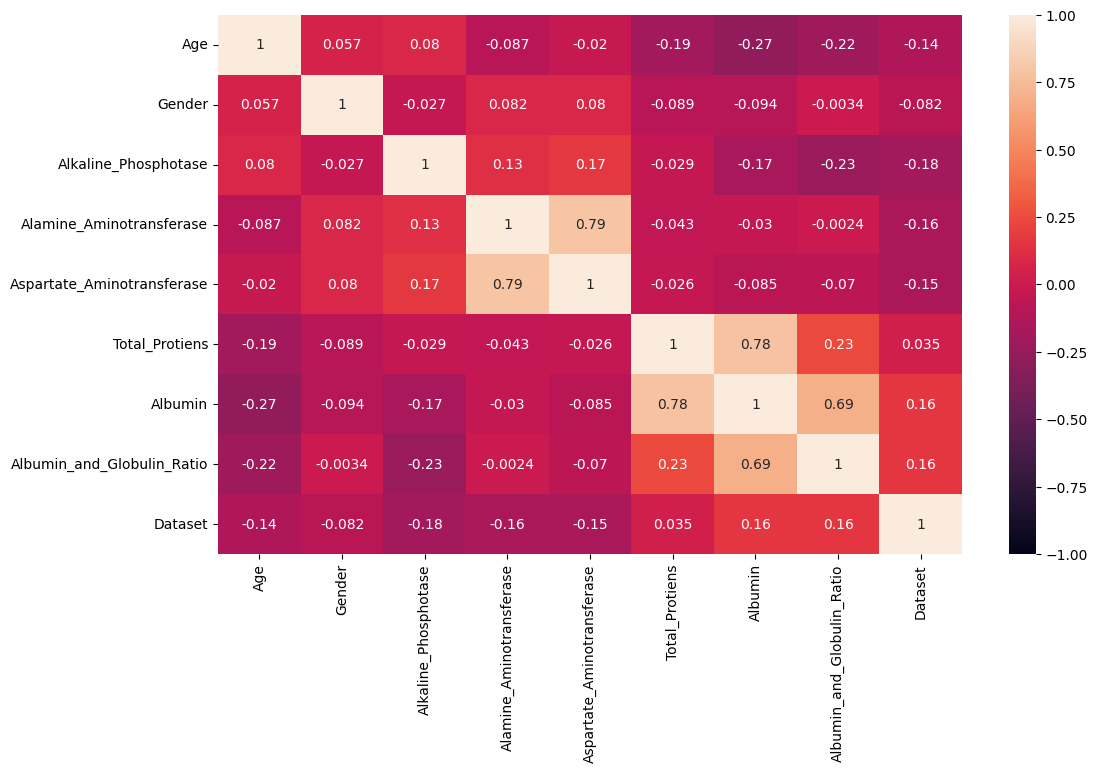

In [13]:
plt.figure(figsize=(12, 7))
sns.heatmap(block.drop(['Total_Bilirubin','Direct_Bilirubin'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()